Steps to Data Analysis

1) No missing values: good
2) Research on feature meaning
3) train/test split
4) EDA

- understand the data
- understand the relationship between the variables
- plotting
- correlation
- cross tab

In [51]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.formula.api as smf
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

from sklearn import linear_model

/Users/raymonddelacruz/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [52]:
pwd

u'/Users/raymonddelacruz/DS-SF-36/classes'

In [53]:
df = pd.read_csv('dataset-energy-efficiency.csv')

df

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [54]:
df.corr()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
RC,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
SA,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
WA,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
RA,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
OH,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
OR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
GA,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
GAD,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
HL,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
CL,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


In [55]:
corr = df.corr()

corr

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
RC,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
SA,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
WA,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
RA,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
OH,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
OR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
GA,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
GAD,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
HL,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
CL,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


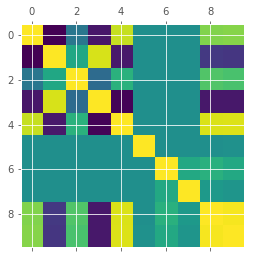

In [56]:
plt.matshow(corr)

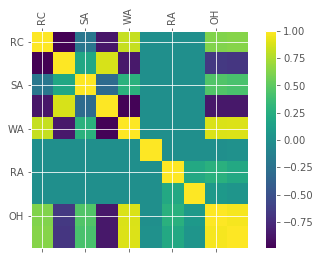

In [57]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

In [58]:
corr = df.corr().round(10)

corr

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
RC,1.000000,-0.991901,-0.203782,-0.868823,0.827747,0.000000,0.000000,0.000000,0.622272,0.634339
SA,-0.991901,1.000000,0.195502,0.880720,-0.858148,0.000000,0.000000,-0.000000,-0.658120,-0.672999
WA,-0.203782,0.195502,1.000000,-0.292316,0.280976,0.000000,-0.000000,0.000000,0.455671,0.427117
RA,-0.868823,0.880720,-0.292316,1.000000,-0.972512,0.000000,-0.000000,-0.000000,-0.861828,-0.862547
OH,0.827747,-0.858148,0.280976,-0.972512,1.000000,0.000000,0.000000,0.000000,0.889430,0.895785
OR,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.002587,0.014290
GA,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.212964,0.269842,0.207505
GAD,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.212964,1.000000,0.087368,0.050525
HL,0.622272,-0.658120,0.455671,-0.861828,0.889430,-0.002587,0.269842,0.087368,1.000000,0.975862
CL,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


In [59]:
df.drop(['RA', 'OR', 'GAD'], axis = 1, inplace = True)

In [60]:
df

,RC,SA,WA,OH,GA,HL,CL
0,0.98,514.5,294.0,7.0,0.0,15.55,21.33
1,0.98,514.5,294.0,7.0,0.0,15.55,21.33
2,0.98,514.5,294.0,7.0,0.0,15.55,21.33
3,0.98,514.5,294.0,7.0,0.0,15.55,21.33
4,0.90,563.5,318.5,7.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,3.5,0.4,17.88,21.40
764,0.62,808.5,367.5,3.5,0.4,16.54,16.88
765,0.62,808.5,367.5,3.5,0.4,16.44,17.11
766,0.62,808.5,367.5,3.5,0.4,16.48,16.61


In [61]:
df.corr().round(10)

,RC,SA,WA,OH,GA,HL,CL
RC,1.000000,-0.991901,-0.203782,0.827747,0.000000,0.622272,0.634339
SA,-0.991901,1.000000,0.195502,-0.858148,0.000000,-0.658120,-0.672999
WA,-0.203782,0.195502,1.000000,0.280976,-0.000000,0.455671,0.427117
OH,0.827747,-0.858148,0.280976,1.000000,0.000000,0.889430,0.895785
GA,0.000000,0.000000,-0.000000,0.000000,1.000000,0.269842,0.207505
HL,0.622272,-0.658120,0.455671,0.889430,0.269842,1.000000,0.975862
CL,0.634339,-0.672999,0.427117,0.895785,0.207505,0.975862,1.000000


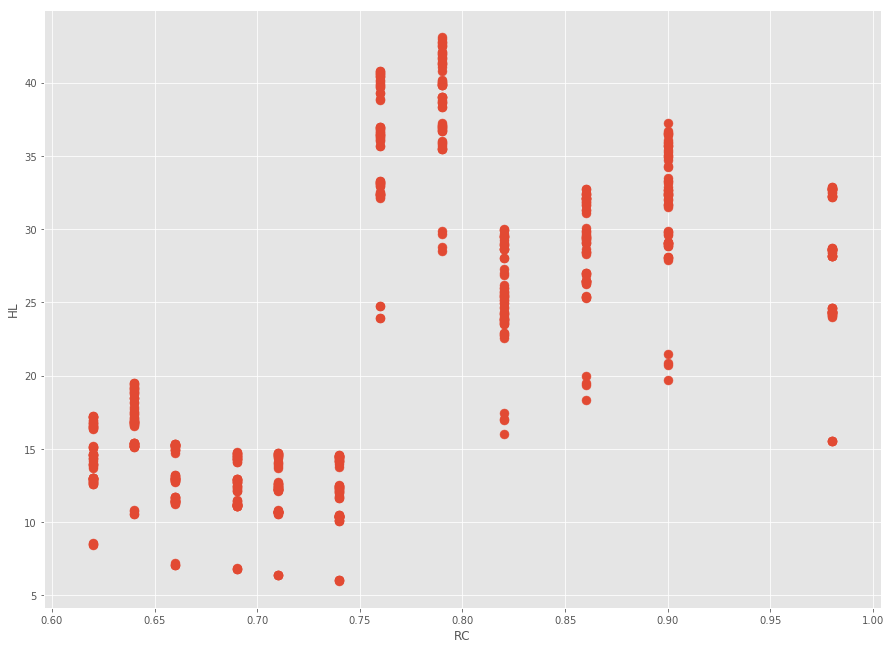

In [80]:
plt.figure(figsize=(15,11))
plt.scatter(df['RC'], df['HL'], s=80)
plt.xlabel("RC",)
plt.ylabel("HL");

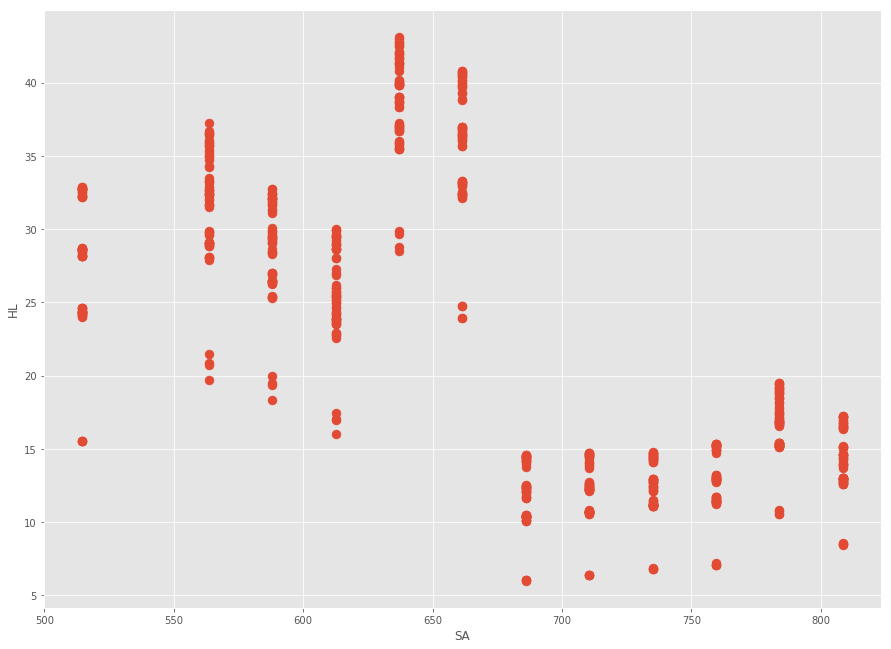

In [81]:
plt.figure(figsize=(15,11))
plt.scatter(df['SA'], df['HL'], s=80)
plt.xlabel("SA",)
plt.ylabel("HL");

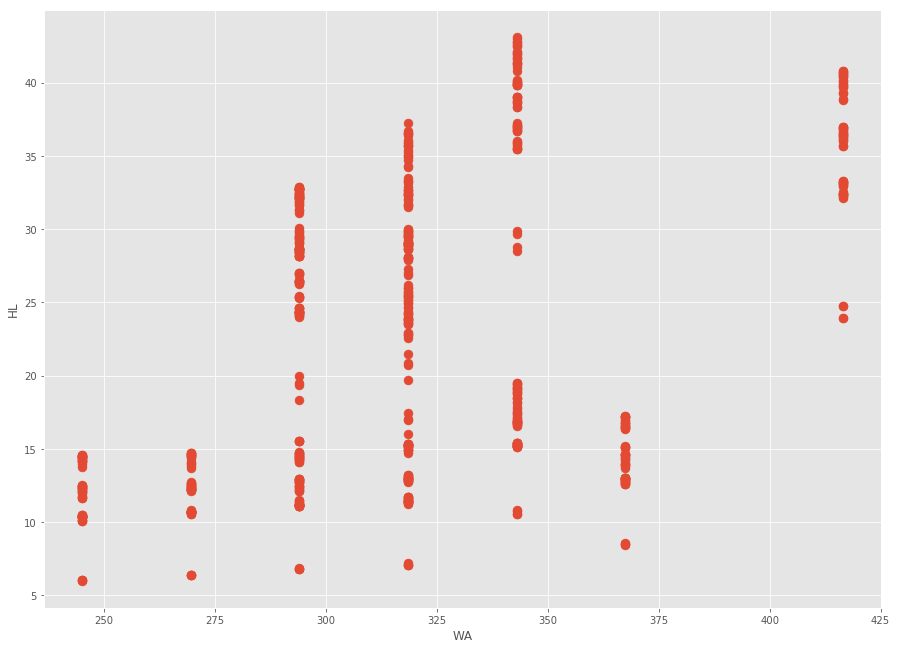

In [88]:
plt.figure(figsize=(15,11))
plt.scatter(df['WA'], df['HL'], s=80)
plt.xlabel("WA",)
plt.ylabel("HL");

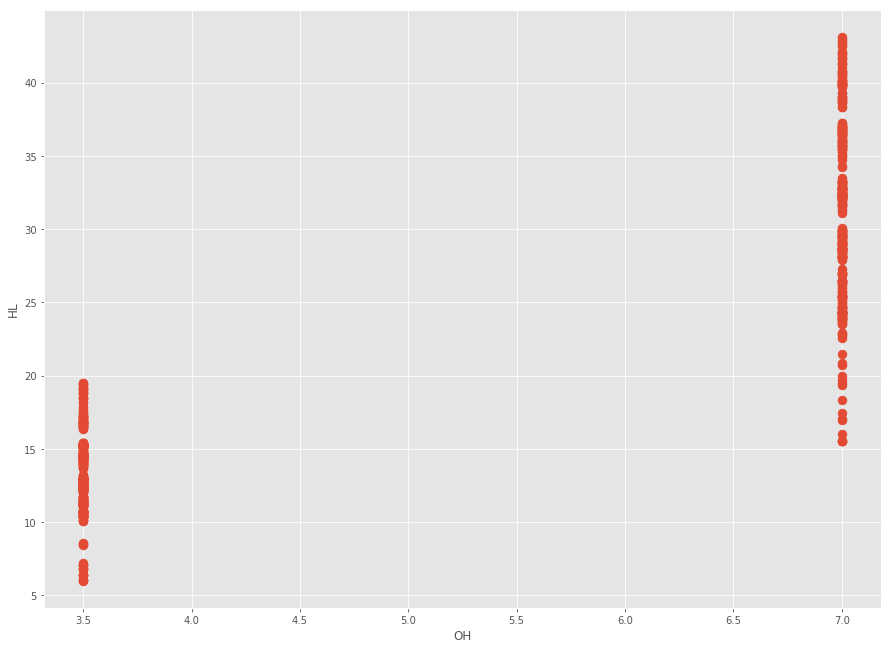

In [84]:
plt.figure(figsize=(15,11))
plt.scatter(df['OH'], df['HL'], s=80)
plt.xlabel("OH",)
plt.ylabel("HL");

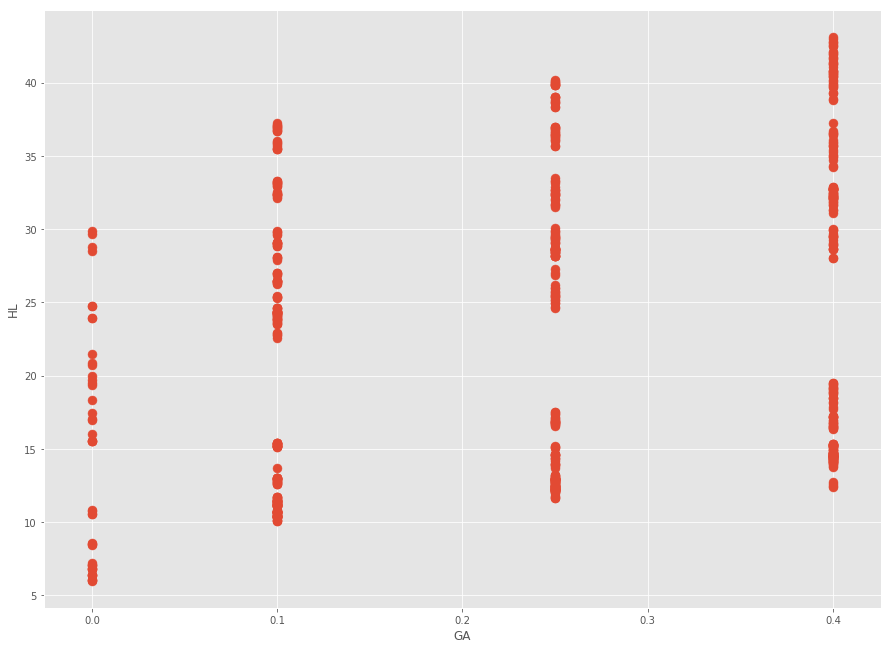

In [85]:
plt.figure(figsize=(15,11))
plt.scatter(df['GA'], df['HL'], s=80)
plt.xlabel("GA",)
plt.ylabel("HL");

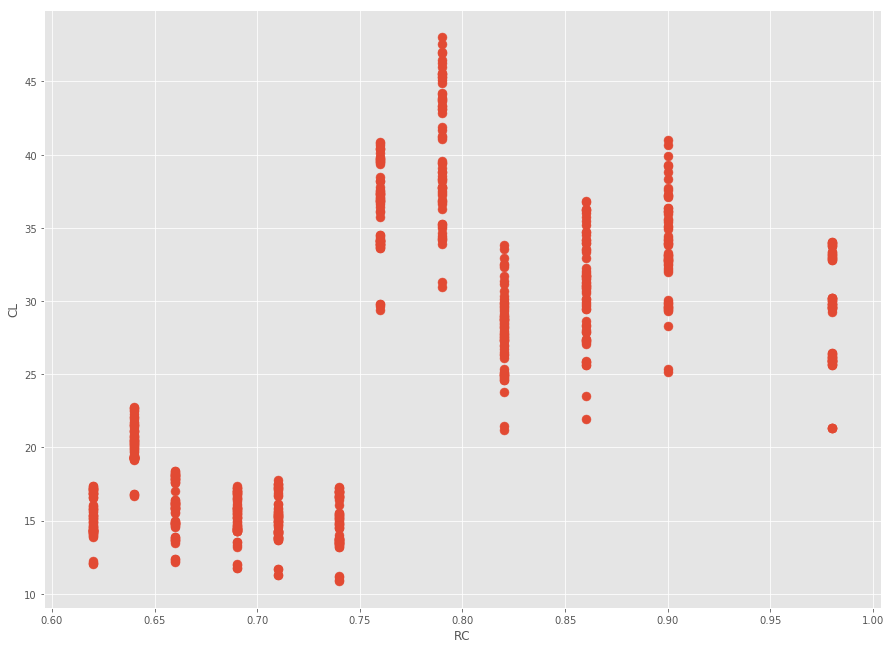

In [86]:
plt.figure(figsize=(15,11))
plt.scatter(df['RC'], df['CL'], s=80)
plt.xlabel("RC",)
plt.ylabel("CL");

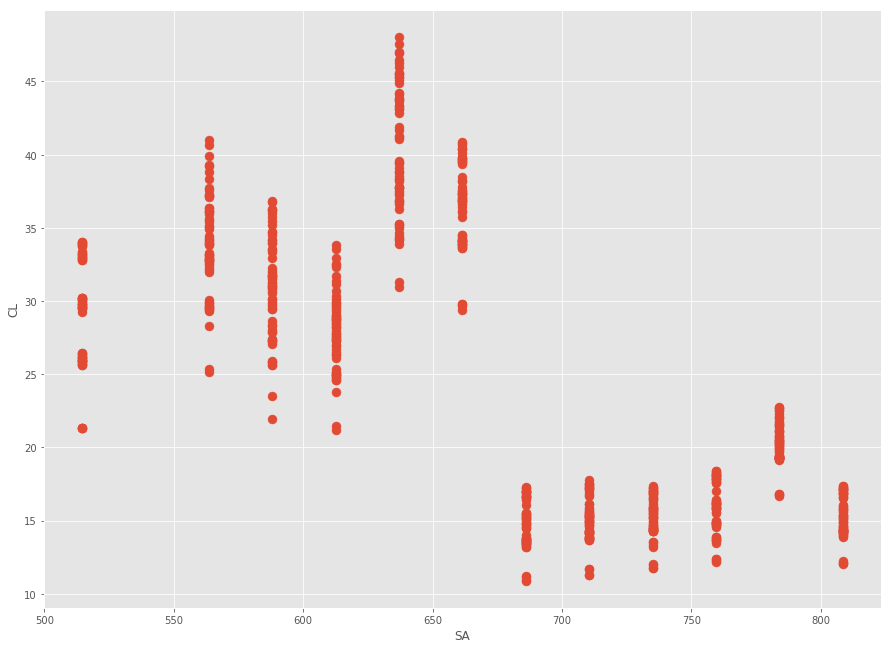

In [87]:
plt.figure(figsize=(15,11))
plt.scatter(df['SA'], df['CL'], s=80)
plt.xlabel("SA",)
plt.ylabel("CL");

In [89]:
smf.ols(formula = 'HL ~ RC + WA + RC*WA', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HL   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     973.8
Date:                Mon, 21 Aug 2017   Prob (F-statistic):          1.75e-260
Time:                        20:34:28   Log-Likelihood:                -2260.3
No. Observations:                 768   AIC:                             4529.
Df Residuals:                     764   BIC:                             4547.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.3926     15.095      8.572      0.000      99.759     159.026
RC          -207.5400     20.298    -10.225      0.000    -247.386    -167.694
WA            -0.5135      0.048    -10.778      0.000      -0.607      -0.420
RC:WA          0.8870      0.064     13.774      0.000       0.761       1.013
==============================================================================
Omnibus:                       28.212   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.163
Skew:                           0.216   Prob(JB):                     6.37e-13
Kurtosis:                       4.253   Cond. No.                     6.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model = smf.ols(formula = 'HL ~ RC + WA + RC*WA', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HL   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     973.8
Date:                Mon, 21 Aug 2017   Prob (F-statistic):          1.75e-260
Time:                        20:46:22   Log-Likelihood:                -2260.3
No. Observations:                 768   AIC:                             4529.
Df Residuals:                     764   BIC:                             4547.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.3926     15.095      8.572      0.000      99.759     159.026
RC          -207.5400     20.298    -10.225      0.000    -247.386    -167.694
WA            -0.5135      0.048    -10.778      0.000      -0.607      -0.420
RC:WA          0.8870      0.064     13.774      0.000       0.761       1.013
==============================================================================
Omnibus:                       28.212   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.163
Skew:                           0.216   Prob(JB):                     6.37e-13
Kurtosis:                       4.253   Cond. No.                     6.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
formula = 'HL ~ RC + WA + RC*WA'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

R^2 = 0.792688712205 (original model)


In [94]:
x_df = pd.DataFrame(index = df.index)

np.random.seed(seed = 0)
for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(df.shape[0])

formula = 'HL ~ RC + WA + RC*WA'
formula += ' + '.join(x_df.columns.values)

In [95]:
formula

'HL ~ RC + WA + RC*WAX0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19 + X20 + X21 + X22 + X23 + X24 + X25 + X26 + X27 + X28 + X29 + X30 + X31 + X32 + X33 + X34 + X35 + X36 + X37 + X38 + X39 + X40 + X41 + X42 + X43 + X44 + X45 + X46 + X47 + X48 + X49 + X50 + X51 + X52 + X53 + X54 + X55 + X56 + X57 + X58 + X59 + X60 + X61 + X62 + X63 + X64 + X65 + X66 + X67 + X68 + X69 + X70 + X71 + X72 + X73 + X74 + X75 + X76 + X77 + X78 + X79 + X80 + X81 + X82 + X83 + X84 + X85 + X86 + X87 + X88 + X89 + X90 + X91 + X92 + X93 + X94 + X95 + X96 + X97 + X98 + X99'

In [101]:
model.rsquared

0.79268871220516179

In [105]:
X = df[ ['HL'] ]
y = df.RC

model = linear_model.LinearRegression().fit(X, y)

In [106]:
summary(X, y, model)

R^2 = 0.387222361932

Coefficients
- beta_0 (Intercept) = 0.618648089862
- beta_1 (HL) = 0.00652339188169 (p-value = 1.59157561136e-83)


In [107]:
model.score(X, y)

0.38722236193215898